In [1]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.19.1', 'qiskit-aer': '0.10.2', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': '0.34.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

# Saving IBMQ account and checking by loading the IBMQ account.

In [6]:
from qiskit import IBMQ
IBMQ.save_account("9ceff82943780abbdf42254be95c376f00853c786c25d6392de8308826a022e5fc94311ac6c2a883ef69411de3d64ca2325ae69276477d715198b07d16a447ab")
IBMQ.load_account()

# Hello World Application

In [2]:
from qiskit import *
%matplotlib inline

In [3]:
qr=QuantumRegister(2)

In [4]:
cr=ClassicalRegister(2)

In [5]:
circuit = QuantumCircuit(qr,cr)

In [6]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [7]:
circuit.h(qr[0])

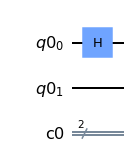

In [8]:
circuit.draw(output="mpl")

In [9]:
circuit.cx(qr[0],qr[1])

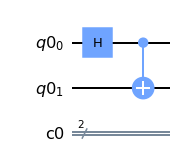

In [10]:
circuit.draw(output="mpl")

## Making a quantum measurement

In [11]:
circuit.measure(qr,cr)

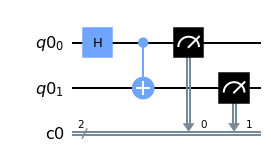

In [12]:
circuit.draw(output="mpl")

## Running the quantum citcuit on quantum simulator

In [13]:
simulator = Aer.get_backend("qasm_simulator")

In [15]:
result=execute(circuit, backend = simulator).result()

In [16]:
from qiskit.tools.visualization import plot_histogram

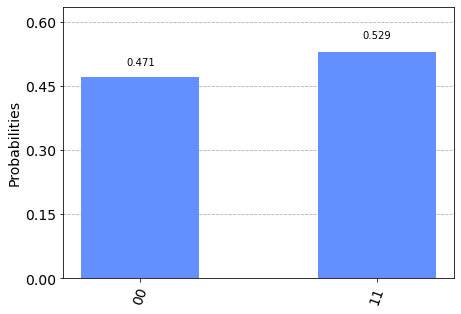

In [17]:
plot_histogram(result.get_counts(circuit))

# Running the code on a quantum computer at IBM

In [18]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [19]:
provider = IBMQ.get_provider("ibm-q")

In [22]:
qcomp=provider.get_backend('ibmq_manila')

In [23]:
job = execute(circuit, backend=qcomp)

In [24]:
from qiskit.tools.monitor import job_monitor

In [25]:
job_monitor(job)

Job Status: job has successfully run


In [27]:
result=job.result()

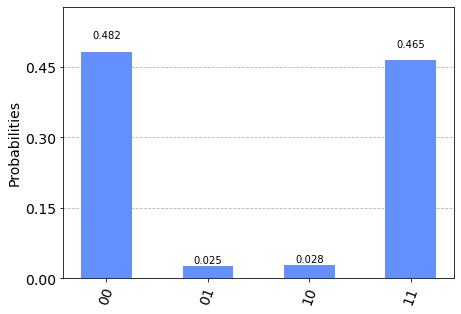

In [33]:
plot_histogram(result.get_counts(circuit))

In [30]:
result.get_counts

Result(backend_name='ibmq_manila', backend_version='1.0.22', qobj_id='d2a81dcf-0078-4ef0-a079-e3d40a7e6e19', job_id='61dfe57884e3d2f08835ed7b', success=True, results=[ExperimentResult(shots=4000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1928, '0x1': 102, '0x2': 111, '0x3': 1859}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], global_phase=0.7853981633974483, memory_slots=2, metadata={}, n_qubits=5, name='circuit-2', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]))], date=2022-01-13 11:19:35+01:00, status=Successful completion, status=QobjHeader(backend_name='ibmq_manila', backend_version='1.0.22'), execution_id='4a9d53e4-745a-11ec-9c00-bc97e15b08d0', time_taken=6.321573495864868, error=None, client_version={'qiskit': '0.34.1'})